In [4]:
# Work towards the following requirements:
# a) Use “Service Area Dataset” from MongoDB. Find and plot the count
# of ServiceAreaName, SourceName , and BusinessYear across the
# country each state?

# b) Use “Service Area Dataset” from MongoDB. Find and plot the count
# of “ sources ” across the country.

# c) Use the “Benefit-Cost Sharing” dataset from MongoDB. Display a
# table of the names of the plans with the most customers by state, the
# number of customers for that plan and the total number of customers.
# ( Hint: use Statecode, benefitName)

# d) Use the “Benefit Cost Sharing” dataset from MongoDB. Find and
# plot the number of benefit plans in each state.

# e) Use the “Insurance” dataset from MongoDB and find the number of
# mothers who smoke and also have children.

# f) Use the “Insurance” dataset from MongoDB. Find out which region
# has the highest rate of smokers. Plot the results for each region.

In [1]:
import pymongo as mongo
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

client = mongo.MongoClient()

In [2]:
db = client.Health_Insurance_Marketplace

In [3]:
service_area_c = db.service_area
benefit_cost_c = db.benefit_cost
insurance_c = db.insurance

In [4]:
df_se = pd.DataFrame(list(service_area_c.find()))
df_bc = pd.DataFrame(list(benefit_cost_c.find()))
df_ic = pd.DataFrame(list(insurance_c.find()))

In [5]:
df_se.dropna(inplace = True) 

In [7]:
#de_sed = df_se.describe(include=['SourceName'])
df_se.describe()

,BusinessYear,County,CoverEntireState,DentalOnlyPlan,ImportDate,IssuerId,IssuerId2,MarketCoverage,PartialCounty,PartialCountyJustification,RowNumber,ServiceAreaId,ServiceAreaName,SourceName,StateCode,StateCode2,VersionNum,ZipCodes,_id
count,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247,42247
unique,3,2581,78,322,272,910,910,556,567,231,478,498,1778,3,39,39,23,312,42247
top,2015,No,No,,2015-08-26 09:56:12,88380,88380,,No,,13,MIS001,"""HealthKeepers",SERFF,MI,MI,6,,5db0e37274e9ab3a504310a4
freq,17495,2145,37929,19877,2051,1446,1446,19494,37465,41253,2410,4149,1446,20188,6217,6217,5244,39120,1


### Work towards the following requirements:
### a) Use “Service Area Dataset” from MongoDB. Find and plot the count of ServiceAreaName, SourceName , 
### and BusinessYear across the country each state?

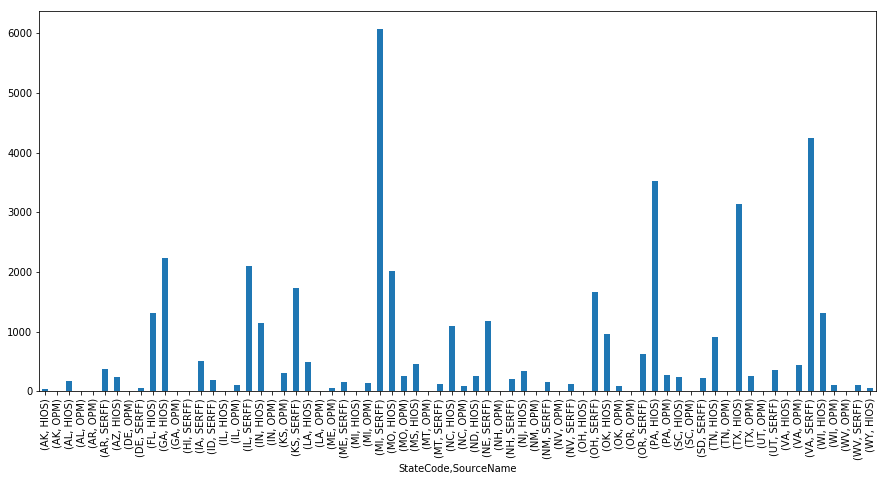

In [8]:
df_sc_sn = df_se.groupby(["StateCode","SourceName"]).SourceName.count()
df_sc_sn.plot.bar(figsize=(15,7))

In [12]:
df_sc_sn

StateCode  SourceName
AK         HIOS            35
           OPM              6
AL         HIOS           175
           OPM              1
AR         OPM              3
           SERFF          364
AZ         HIOS           232
DE         OPM              3
           SERFF           53
FL         HIOS          1305
GA         HIOS          2241
           OPM              3
HI         SERFF            6
IA         SERFF          514
ID         SERFF          188
IL         HIOS             1
           OPM            108
           SERFF         2107
IN         HIOS          1147
           OPM              3
KS         OPM            309
           SERFF         1728
LA         HIOS           491
           OPM              3
ME         OPM             48
           SERFF          157
MI         HIOS             1
           OPM            139
           SERFF         6077
MO         HIOS          2022
                         ... 
NJ         HIOS           343
NM         OPM    

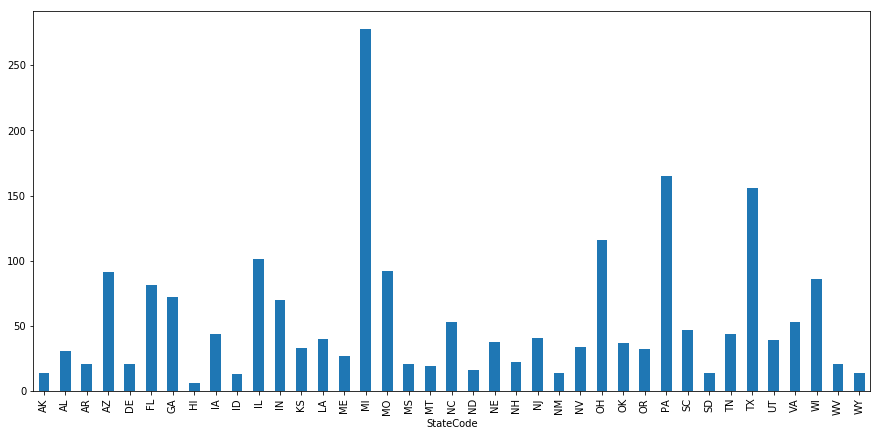

In [9]:
df_SA_plot = df_se.groupby("StateCode")['ServiceAreaName'].nunique()
df_SA_plot.plot(kind="bar",figsize=(15,7))

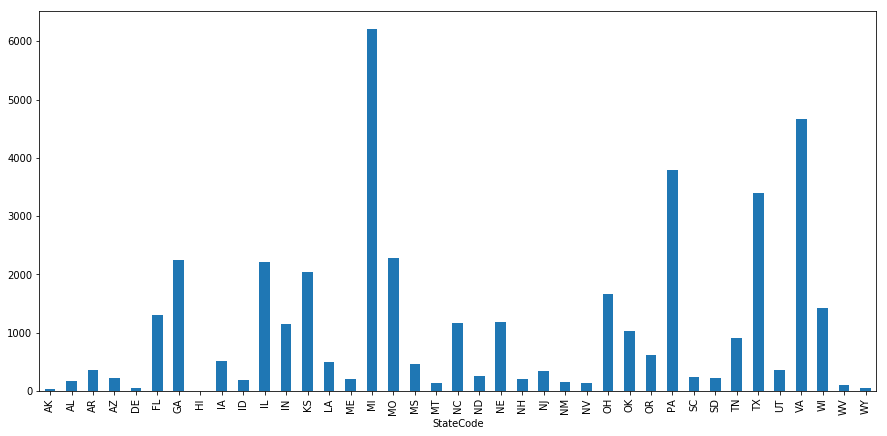

In [10]:
df_sc_by = df_se.groupby(["StateCode"]).BusinessYear.count()
df_sc_by.plot(kind="bar",figsize=(15,7))

### b) Use “Service Area Dataset” from MongoDB. Find and plot the count of “ sources ” across the country.

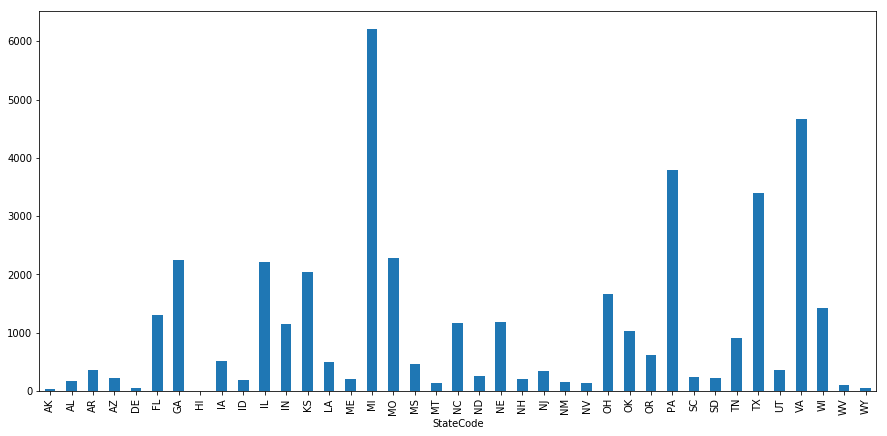

In [14]:
df_se_plot = df_se.groupby("StateCode")['SourceName'].count()
df_se_plot.plot(kind="bar",figsize=(15,7))

#### c) Use the “Benefit-Cost Sharing” dataset from MongoDB. Display a table of the names of the plans with the most 
#### customers by state, the number of customers for that plan and the total number of customers.

In [11]:
df_bc[['BenefitName','StateCode']].groupby('StateCode').describe()

BenefitName                                                      
                count unique                                     top   freq
StateCode                                                                  
                59806     34  Other Practitioner Office Visit (Nurse  13651
AK              13385     72                       Accidental Dental    241
AL               7199    103                       Accidental Dental    194
AR              21909     77               Major Dental Care - Child    394
AZ              81253    111               Major Dental Care - Child   1307
DE               6910    100            Dental Check-Up for Children    151
FL              90996    131            Dental Check-Up for Children   1415
GA              26342    108         Routine Dental Services (Adult)    476
IA              36022     83         Routine Dental Services (Adult)    586
ID              25372     66                     Orthodontia - Child    447
IL              50275    120               Major Dental Care - Child    733
IN              52165     74               Basic Dental Care - Child    834
KS              18457     70                       Accidental Dental    317
LA              31988    105               Basic Dental Care - Child    531
ME              10280     76                       Accidental Dental    181
MI              32844    157               Major Dental Care - Child    686
MO              14167     96                       Accidental Dental    291
MS              10196     88                       Accidental Dental    179
MT              13866     70                       Accidental Dental    289
NC              22487     76         Routine Dental Services (Adult)    367
ND              14071     69                       Accidental Dental    306
NE              22580     75         Routine Dental Services (Adult)    427
NH               3110     68                     Orthodontia - Adult     71
NJ              18602     81                       Accidental Dental    363
NM              14605     72                       Accidental Dental    235
OH              58398     84         Routine Dental Services (Adult)    965
OK              26904     70                       Accidental Dental    480
PA              52321    125         Routine Dental Services (Adult)    952
SC              15795     72                       Accidental Dental    302
TN              29004    104                       Accidental Dental    461
TX              47880    125               Major Dental Care - Child    829
VA               1440     72                     Orthodontia - Adult     20
WI             109604    109               Major Dental Care - Adult   1604
WV                621     69                Prescription Drugs Other      9
WY               7720     85                       Accidental Dental    160

#### d) Use the “Benefit Cost Sharing” dataset from MongoDB. Find and plot the number of benefit plans in each state.

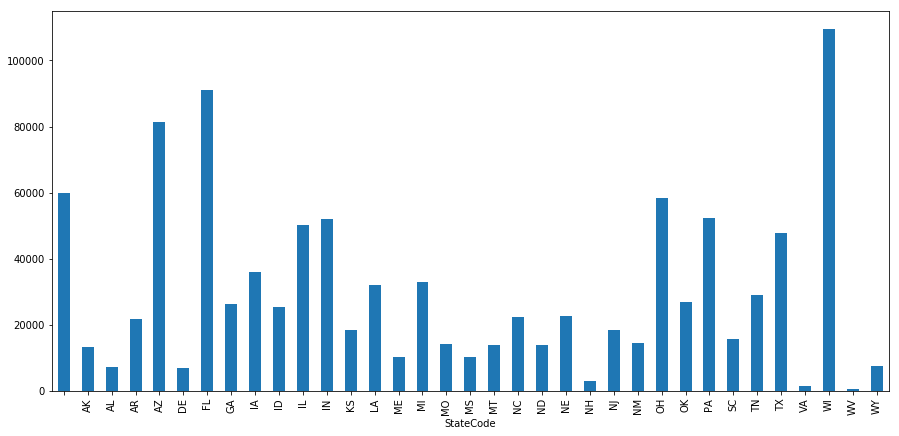

In [81]:
df_bc_g = df_bc.groupby(["StateCode"]).BenefitName.count()
df_bc_g.plot(kind="bar",figsize=(15,7))

#### e) Use the “Insurance” dataset from MongoDB and find the number of mothers who smoke and also have children.

In [97]:
#df_M_S_C = df_ic.loc[df_se['SourceName'] == ''].groupby("StateCode").count()
df_M = df_ic.loc[df_ic['sex'] == 'female']
df_M_C = df_M.loc[df_M['children'] != '0']
df_M_C_S = df_M_C.loc[df_M_C['smoker'] == 'yes']
df_M_C_S.count()[0]

62

#### f) Use the “Insurance” dataset from MongoDB. Find out which region has the highest rate of smokers. Plot the results for each region.

In [120]:
df_ic_s= df_ic.loc[df_ic['smoker'] == 'yes']
df_ic_s_r = df_ic_s.groupby('region').count()
df_ic_s_r.smoker

region
northeast    67
northwest    58
southeast    91
southwest    58
Name: smoker, dtype: int64

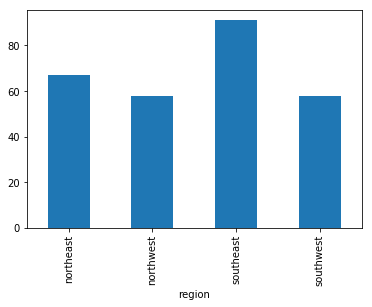

In [122]:
df_ic_s_r.smoker.plot(kind="bar")

In [123]:
df_ic_s_region = df_ic_s_r.smoker.max()

91